In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sns

**FIGURE COEFFICIENTS**

In [4]:
# load data and show non zero coefficients
coef = pd.read_excel('coef_lasso_loocv.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})
coef.loc[:, ('abs')] = coef.apply(lambda row: abs(row.coefficient) ,axis = 1)
non_zero = [item for item in coef.sort_values(['abs'], ascending = False)[coef.coefficient != 0].set_index('Feature').index]
print(non_zero)

# transpose data and get non-zero coefficients for the figure
coef = coef.drop(columns = ['coefficient', 'std', 'abs']).set_index('Feature')
coef = coef.transpose()[non_zero].rename(columns = {'gender_F' : 'sex_F'})
coef

['lh_parstriangularis_volume', 'lh_caudalmiddlefrontal_volume', 'gender_F', 'rh_postcentral_volume', 'rh_entorhinal_volume', 'Left-Accumbens-area', 'rh_transversetemporal_volume', 'lh_postcentral_volume', 'RANDOM', 'rh_rostralanteriorcingulate_volume', 'lh_entorhinal_volume', 'lh_superiortemporal_volume', 'lh_parsorbitalis_volume', 'lh_superiorparietal_volume', 'rh_frontalpole_volume', 'lh_fusiform_volume']


C:\Users\Esra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Feature,lh_parstriangularis_volume,lh_caudalmiddlefrontal_volume,sex_F,rh_postcentral_volume,rh_entorhinal_volume,Left-Accumbens-area,rh_transversetemporal_volume,lh_postcentral_volume,RANDOM,rh_rostralanteriorcingulate_volume,lh_entorhinal_volume,lh_superiortemporal_volume,lh_parsorbitalis_volume,lh_superiorparietal_volume,rh_frontalpole_volume,lh_fusiform_volume
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.041651,-0.009343,0.013381,-0.011429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.042968,-0.006492,0.012130,-0.010711,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.046070,-0.007652,0.013734,-0.011150,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.038873,-0.004630,0.009727,-0.006528,0.0,0.0,0.0,0.0,-0.024702,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# load data and show non zero coefficients
coef_bm = pd.read_excel('coef_lasso_loocv_nonzero_bestmodel.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})

# transpose data and get non-zero coefficients for the figure
coef_bm = coef_bm.drop(columns = ['coefficient', 'std']).set_index('Feature')
coef_bm = coef_bm.transpose()[non_zero].rename(columns = {'gender_F' : 'sex_F'})
coef_bm

Feature,lh_parstriangularis_volume,lh_caudalmiddlefrontal_volume,sex_F,rh_postcentral_volume,rh_entorhinal_volume,Left-Accumbens-area,rh_transversetemporal_volume,lh_postcentral_volume,RANDOM,rh_rostralanteriorcingulate_volume,lh_entorhinal_volume,lh_superiortemporal_volume,lh_parsorbitalis_volume,lh_superiorparietal_volume,rh_frontalpole_volume,lh_fusiform_volume
0,0.116448,-0.068187,0.017484,-0.036482,0.080650,0.051654,-0.024918,-0.012236,0.000000,0.054656,0.000000,-0.051928,0.017521,0.024391,0.036258,-0.042845
1,0.112882,-0.062100,0.013424,-0.032672,0.080468,0.053992,-0.033448,-0.014084,0.017260,0.070561,0.003018,-0.037042,0.013848,0.031932,0.015003,-0.045244
2,0.118328,-0.066929,0.012512,-0.051922,0.079462,0.044396,-0.020599,-0.010950,-0.040206,0.064513,0.000000,-0.067792,0.005173,0.041666,0.028873,-0.034672
3,0.115922,-0.073999,0.015491,-0.036497,0.067536,0.063114,-0.037454,-0.006848,0.016432,0.037401,0.000000,-0.037855,0.016829,0.029898,0.041651,-0.051455
4,0.119549,-0.079584,0.011950,-0.036675,0.072427,0.059713,-0.031837,-0.002613,0.000000,0.058680,0.017704,-0.055842,0.019368,0.029939,0.041844,-0.041152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.116998,-0.076266,0.017920,-0.041873,0.073381,0.045588,-0.029181,-0.012529,-0.002099,0.059004,0.000000,-0.051768,0.021712,0.023501,0.044107,-0.044043
137,0.119624,-0.071580,0.016169,-0.042156,0.077133,0.049225,-0.029513,-0.011463,0.000000,0.059929,0.000000,-0.054532,0.019446,0.026668,0.036862,-0.044260
138,0.114902,-0.078242,0.020102,-0.041877,0.073202,0.054356,-0.024888,-0.012673,0.022874,0.061132,0.000000,-0.055521,0.023907,0.025805,0.031119,-0.044082
139,0.118673,-0.072553,0.017040,-0.041875,0.077041,0.048525,-0.029534,-0.012719,0.000000,0.059523,0.000000,-0.051920,0.020149,0.027151,0.038328,-0.043688


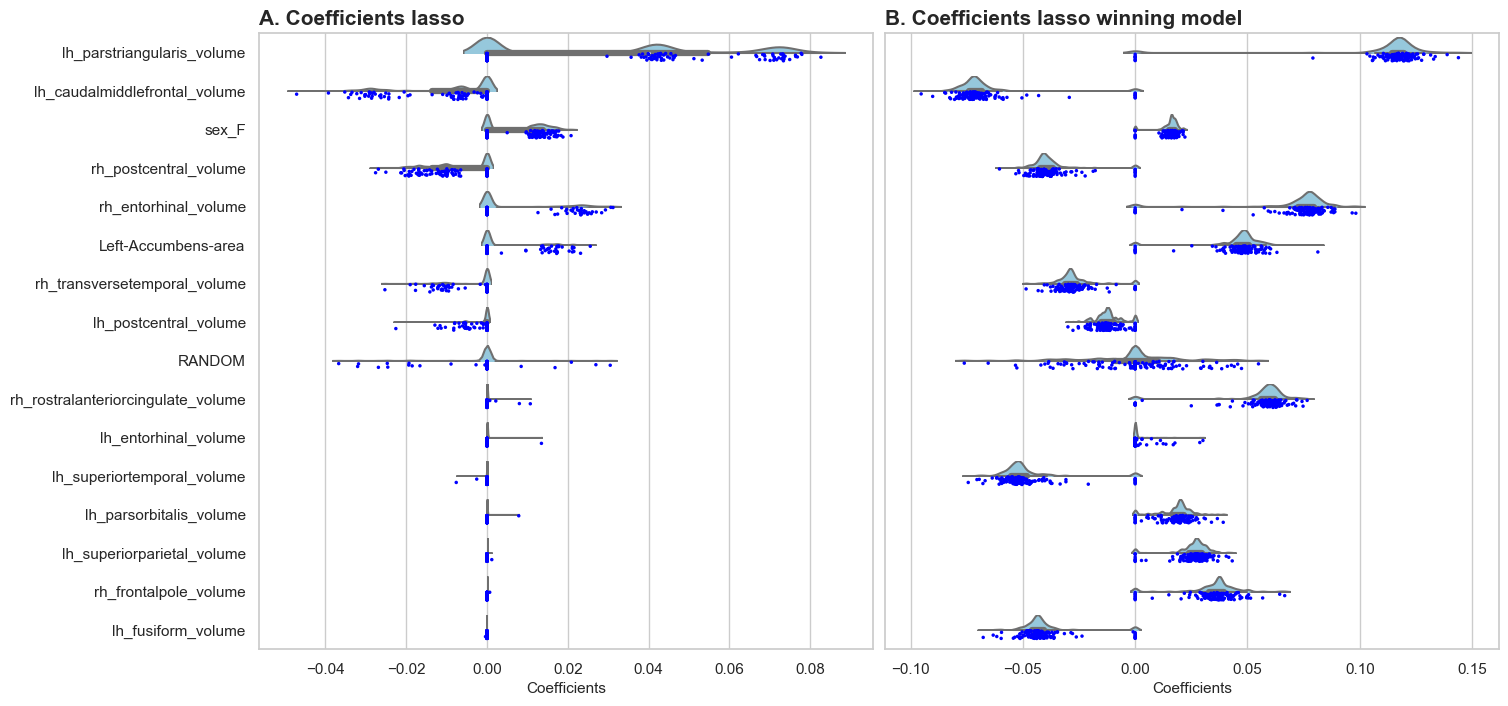

In [6]:
# make figure
sns.reset_defaults()
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.violinplot(data = coef,  orient = 'h', scale = 'width', ax = ax1,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
for violin in ax1.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax1.transData))

old_len_collections = len(ax1.collections)
sns.stripplot(data = coef, orient = 'h', ax = ax1, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax1.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xlabel("Coefficients", fontsize = 11)
ax1.set_title("A. Coefficients lasso", fontsize = 15, loc = 'left', fontweight = 'bold')

# plot best model

sns.violinplot(data = coef_bm,  orient = 'h', scale = 'width', ax = ax2,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax2.get_xlim()
ylim = ax2.get_ylim()
for violin in ax2.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax2.transData))

old_len_collections = len(ax2.collections)
sns.stripplot(data = coef_bm, orient = 'h', ax = ax2, size = 2.5, color = 'blue').set(ylabel = None, yticks = [])

for dots in ax2.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel("Coefficients", fontsize = 11)
ax2.set_title("B. Coefficients lasso winning model", fontsize = 15, loc = 'left', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.02)

# plt.savefig("coef_violin_nonzero_bm.png", bbox_inches="tight")
plt.show()

In [7]:
table_coef = coef.transpose()
calc_coef = coef.transpose()

table_coef['mean'] = calc_coef.apply(lambda row: format(100 * np.mean(row), '.4f'), axis = 1)
table_coef['SD'] = calc_coef.apply(lambda row: format(100 * np.std(row), '.4f'), axis = 1)
table_coef['mean_'] = calc_coef.apply(lambda row: format(np.mean(row), '.4f'), axis = 1)
table_coef['sd_'] = calc_coef.apply(lambda row: format(np.std(row), '.4f'), axis = 1)

table_coef['median'] = calc_coef.apply(lambda row: format(100 * np.median(row), '.4f'), axis = 1)
table_coef['95%'] = calc_coef.apply(lambda row: [format(100 * np.quantile(row, 0.05), '.4f'), format(100 *  np.quantile(row, 0.95), '.4f')] if row.name == 'RANDOM' else ([format(100 * np.quantile(row, 0.05), '.4f'), format(100 * row.max(), '.4f')] if row.mean() > 0 else [format(100 * row.min(), '.4f'), format(100 * np.quantile(row, 0.95), '.4f')]), axis = 1)
table_coef['min'] = calc_coef.apply(lambda row: format(100 * np.min(row), '.4f'), axis = 1)
table_coef['max'] = calc_coef.apply(lambda row: format(100 * np.max(row), '.4f'), axis = 1)

table_coef = table_coef[['mean', 'SD', 'median', '95%', 'min', 'max']]
# table_coef.to_excel("coef_descriptives.xlsx")
table_coef

,mean,SD,median,95%,min,max
Feature,,,,,,
lh_parstriangularis_volume,3.1709,2.9611,4.0167,"[0.0000, 8.2688]",0.0000,8.2688
lh_caudalmiddlefrontal_volume,-0.8998,1.2065,-0.3197,"[-4.7148, 0.0000]",-4.7148,0.0000
sex_F,0.7799,0.6981,1.0778,"[0.0000, 2.0817]",0.0000,2.0817
rh_postcentral_volume,-0.7453,0.7682,-0.7851,"[-2.7595, 0.0000]",-2.7595,0.0000
rh_entorhinal_volume,0.5527,0.9998,0.0000,"[0.0000, 3.1202]",0.0000,3.1202
Left-Accumbens-area,0.3997,0.7376,0.0000,"[0.0000, 2.5570]",0.0000,2.5570
rh_transversetemporal_volume,-0.2755,0.5358,0.0000,"[-2.5287, 0.0000]",-2.5287,0.0000
lh_postcentral_volume,-0.1555,0.3418,0.0000,"[-2.2575, 0.0000]",-2.2575,0.0000
RANDOM,-0.1128,0.8012,0.0000,"[-1.9322, 0.0000]",-3.6730,3.0516


In [7]:
table_coef = coef.transpose()
calc_coef = coef.transpose()
table_coef['std_1'] = calc_coef.std(axis = 1, ddof = 0)
table_coef['std_2'] = calc_coef.apply(lambda row: np.std(row), axis = 1)
table_coef

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,std_1,std_2
Feature,,,,,,,,,,,,,,,,,,,,,
lh_parstriangularis_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045287,0.0,0.0,0.041651,0.042968,0.046070,0.038873,0.0,0.029611,0.029611
lh_caudalmiddlefrontal_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.008806,0.0,0.0,-0.009343,-0.006492,-0.007652,-0.004630,0.0,0.012065,0.012065
sex_F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010673,0.0,0.0,0.013381,0.012130,0.013734,0.009727,0.0,0.006981,0.006981
rh_postcentral_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011529,0.0,0.0,-0.011429,-0.010711,-0.011150,-0.006528,0.0,0.007682,0.007682
rh_entorhinal_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.009998,0.009998
Left-Accumbens-area,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.007376,0.007376
rh_transversetemporal_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.005358,0.005358
lh_postcentral_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.003418,0.003418
RANDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.024702,0.0,0.008012,0.008012


In [5]:
table_coef_bm = coef_bm.transpose()
calc_coef_bm = coef_bm.transpose()

table_coef_bm['mean'] = calc_coef_bm.apply(lambda row: format(100 * np.mean(row), '.4f'), axis = 1)
table_coef_bm['SD'] = calc_coef_bm.apply(lambda row: format(100 * np.std(row), '.4f'), axis = 1)
table_coef_bm['median'] = calc_coef_bm.apply(lambda row: format(100 * np.median(row), '.4f'), axis = 1)
table_coef_bm['95%'] = calc_coef_bm.apply(lambda row: [format(100 * np.quantile(row, 0.05), '.4f'), format(100 *  np.quantile(row, 0.95), '.4f')] if row.name == 'RANDOM' else ([format(100 * np.quantile(row, 0.05), '.4f'), format(100 * row.max(), '.4f')] if row.mean() > 0 else [format(100 * row.min(), '.4f'), format(100 * np.quantile(row, 0.95), '.4f')]), axis = 1)
table_coef_bm['min'] = calc_coef_bm.apply(lambda row: format(100 * np.min(row), '.4f'), axis = 1)
table_coef_bm['max'] = calc_coef_bm.apply(lambda row: format(100 * np.max(row), '.4f'), axis = 1)

table_coef_bm = table_coef_bm[['mean', 'SD', 'median', '95%', 'min', 'max']]
# table_coef_bm.to_excel("coef_bm_descriptives.xlsx")
table_coef_bm

NameError: name 'coef_bm' is not defined

**FIGURE PERMUTATION IMPORTANCE**

In [7]:
# load data
perm_imp = pd.read_excel('RF_LOOCV_perm_importance.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})
perm_imp = perm_imp.sort_values(['importance'], ascending = False).set_index('Feature').drop(columns = ['importance', 'std']).head(25)
perm_imp = perm_imp.transpose()
perm_imp

Feature,lh_parstriangularis_volume,lh_postcentral_volume,Left-Pallidum,rh_paracentral_volume,rh_postcentral_volume,lh_superiortemporal_volume,lh_parsorbitalis_volume,Putamen,lh_caudalmiddlefrontal_volume,Right-Amygdala,...,rh_parsopercularis_volume,Left-Accumbens-area,CC_Posterior,rh_lateralorbitofrontal_volume,lh_lateralorbitofrontal_volume,lh_inferiortemporal_volume,lh_insula_volume,rh_temporalpole_volume,rh_superiorfrontal_volume,RANDOM
0,0.001422,0.000812,0.000503,0.000555,0.000284,0.000299,0.000221,0.000198,0.000161,0.000192,...,0.000166,0.000232,0.000161,0.000221,0.000185,0.000147,0.000193,0.000118,0.000157,0.000094
1,0.001206,0.000943,0.000502,0.000403,0.000285,0.000218,0.000246,0.000330,0.000210,0.000216,...,0.000139,0.000266,0.000128,0.000272,0.000119,0.000140,0.000174,0.000106,0.000198,0.000108
2,0.001416,0.000762,0.000709,0.000469,0.000348,0.000332,0.000275,0.000279,0.000244,0.000177,...,0.000194,0.000174,0.000185,0.000197,0.000160,0.000192,0.000139,0.000121,0.000140,0.000086
3,0.001405,0.000767,0.000828,0.000341,0.000301,0.000250,0.000232,0.000302,0.000314,0.000195,...,0.000186,0.000257,0.000174,0.000189,0.000187,0.000214,0.000143,0.000108,0.000127,0.000140
4,0.001520,0.000729,0.000672,0.000434,0.000314,0.000359,0.000293,0.000292,0.000289,0.000232,...,0.000199,0.000231,0.000148,0.000157,0.000145,0.000152,0.000150,0.000101,0.000118,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.001391,0.000825,0.000644,0.000362,0.000274,0.000278,0.000313,0.000256,0.000271,0.000255,...,0.000175,0.000178,0.000177,0.000172,0.000147,0.000129,0.000202,0.000151,0.000143,0.000096
137,0.001552,0.000818,0.000521,0.000394,0.000260,0.000331,0.000305,0.000218,0.000262,0.000259,...,0.000212,0.000203,0.000176,0.000150,0.000146,0.000142,0.000180,0.000145,0.000150,0.000083
138,0.001623,0.000834,0.000437,0.000331,0.000244,0.000320,0.000355,0.000258,0.000243,0.000262,...,0.000198,0.000213,0.000171,0.000156,0.000156,0.000136,0.000192,0.000133,0.000178,0.000147
139,0.001466,0.000819,0.000506,0.000427,0.000292,0.000299,0.000313,0.000221,0.000260,0.000266,...,0.000193,0.000201,0.000168,0.000165,0.000150,0.000149,0.000169,0.000132,0.000147,0.000243


In [8]:
# load data
perm_imp_bm = pd.read_excel('RF_LOOCV_perm_importance_bestmodel_nonzero.xlsx').rename(columns = {"Unnamed: 0" : "Feature"})
perm_imp_bm = perm_imp_bm.set_index('Feature').drop(columns = ['importance', 'std'])
perm_imp_bm = perm_imp_bm.transpose()
perm_imp_bm

Feature,lh_parstriangularis_volume,lh_postcentral_volume,Left-Pallidum,rh_paracentral_volume,rh_postcentral_volume,lh_superiortemporal_volume,lh_parsorbitalis_volume,Putamen,lh_caudalmiddlefrontal_volume,Right-Amygdala,...,rh_parsopercularis_volume,Left-Accumbens-area,CC_Posterior,rh_lateralorbitofrontal_volume,lh_lateralorbitofrontal_volume,lh_inferiortemporal_volume,lh_insula_volume,rh_temporalpole_volume,rh_superiorfrontal_volume,RANDOM
0,0.001844,0.001350,0.000946,0.001023,0.000594,0.000585,0.000447,0.000381,0.000465,0.000546,...,0.000365,0.000456,0.000430,0.000450,0.000440,0.000434,0.000430,0.000287,0.000407,0.000263
1,0.001614,0.001473,0.000944,0.000860,0.000623,0.000519,0.000443,0.000521,0.000508,0.000546,...,0.000328,0.000473,0.000375,0.000494,0.000345,0.000358,0.000389,0.000260,0.000486,0.000366
2,0.001802,0.001295,0.001141,0.000921,0.000715,0.000671,0.000463,0.000465,0.000512,0.000486,...,0.000418,0.000375,0.000461,0.000410,0.000397,0.000468,0.000418,0.000323,0.000385,0.000364
3,0.001819,0.001262,0.001297,0.000674,0.000602,0.000522,0.000430,0.000518,0.000695,0.000522,...,0.000428,0.000453,0.000414,0.000391,0.000438,0.000519,0.000370,0.000292,0.000354,0.000277
4,0.001953,0.001266,0.001155,0.000870,0.000642,0.000649,0.000542,0.000474,0.000655,0.000581,...,0.000422,0.000443,0.000390,0.000377,0.000369,0.000363,0.000374,0.000261,0.000343,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.001915,0.001339,0.001077,0.000866,0.000639,0.000597,0.000593,0.000437,0.000608,0.000542,...,0.000423,0.000373,0.000434,0.000320,0.000375,0.000347,0.000462,0.000362,0.000388,0.000217
137,0.002036,0.001247,0.000916,0.000903,0.000628,0.000632,0.000493,0.000412,0.000579,0.000550,...,0.000441,0.000422,0.000397,0.000292,0.000352,0.000337,0.000418,0.000340,0.000398,0.000475
138,0.001903,0.001298,0.000757,0.000731,0.000569,0.000636,0.000607,0.000418,0.000565,0.000538,...,0.000394,0.000449,0.000396,0.000327,0.000375,0.000302,0.000433,0.000319,0.000438,0.000603
139,0.001975,0.001316,0.000960,0.000963,0.000619,0.000619,0.000563,0.000393,0.000600,0.000550,...,0.000423,0.000423,0.000432,0.000297,0.000415,0.000375,0.000406,0.000325,0.000405,0.000330


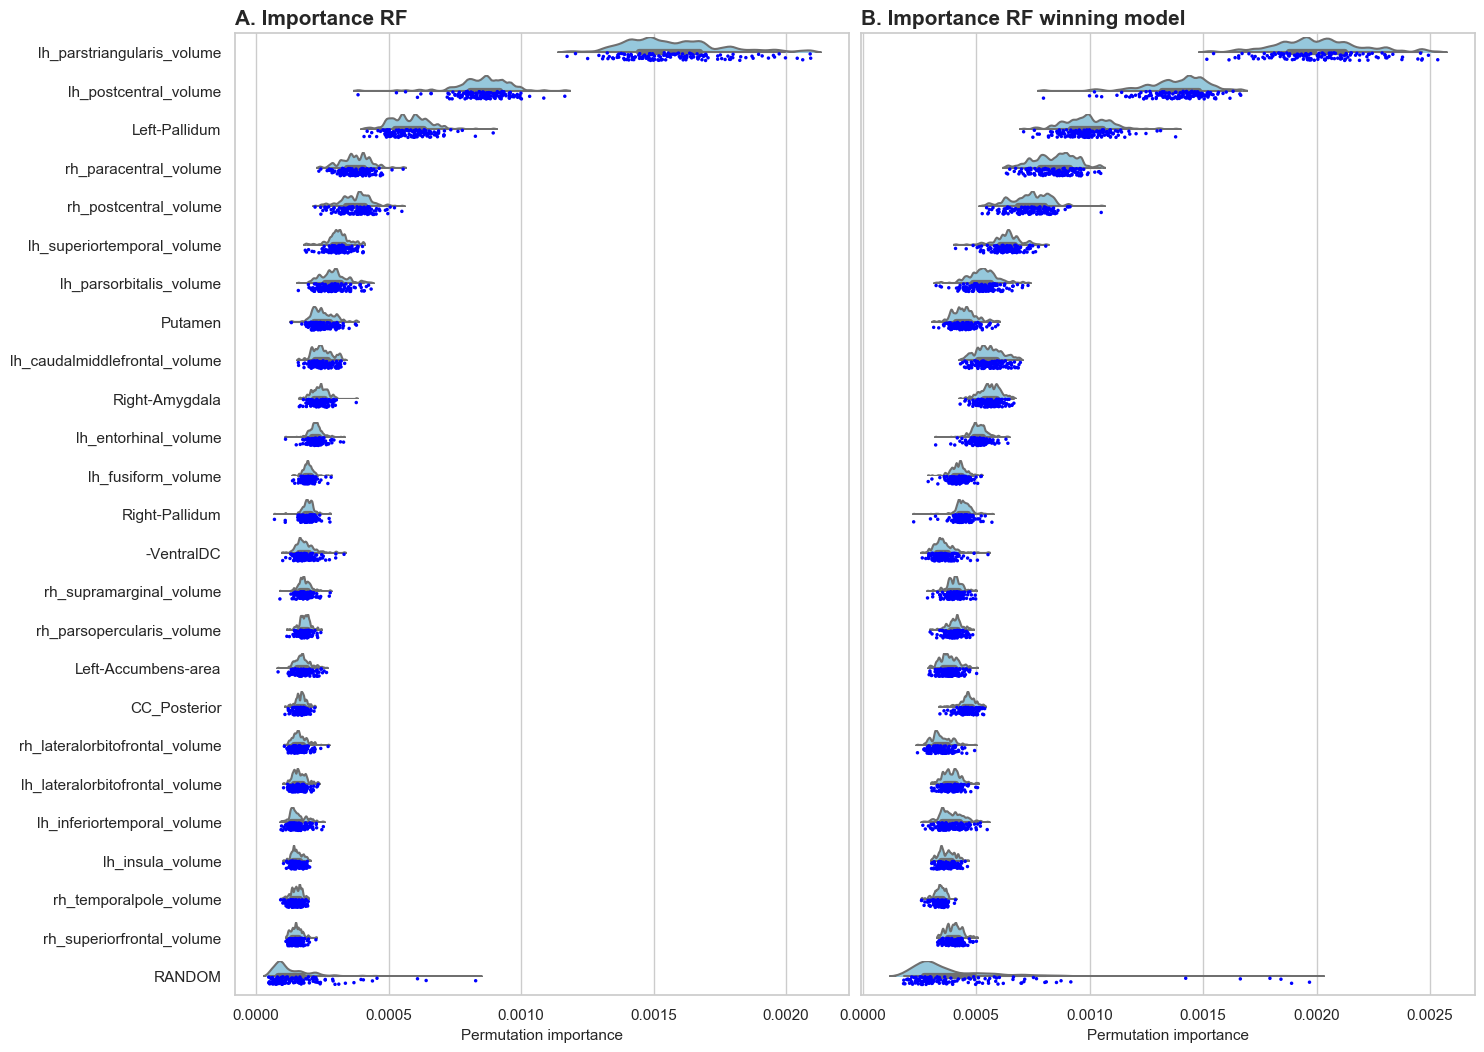

In [89]:
# make figure
sns.reset_defaults()
sns.set(rc={'figure.figsize':(16,12.5)})
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.violinplot(data = perm_imp,  orient = 'h', scale = 'width', ax = ax1,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
for violin in ax1.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax1.transData))

old_len_collections = len(ax1.collections)
sns.stripplot(data = perm_imp, orient = 'h', ax = ax1, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax1.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xlabel("Permutation importance", fontsize = 11)
ax1.set_title("A. Importance RF", fontsize = 15, loc = 'left', fontweight = 'bold')

# plot best model

sns.violinplot(data = perm_imp_bm,  orient = 'h', scale = 'width', ax = ax2,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax2.get_xlim()
ylim = ax2.get_ylim()
for violin in ax2.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax2.transData))

old_len_collections = len(ax2.collections)
sns.stripplot(data = perm_imp_bm, orient = 'h', ax = ax2, size = 2.5, color = 'blue').set(ylabel = None, yticks = [])

for dots in ax2.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel("Permutation importance", fontsize = 11)
ax2.set_title("B. Importance RF winning model", fontsize = 15, loc = 'left', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.02)

plt.savefig("perm_imp_violin_nonzero_bm.png", bbox_inches="tight")
plt.show()

In [10]:
table_perm = perm_imp.transpose()
calc_perm = perm_imp.transpose()

table_perm['mean'] = calc_perm.apply(lambda row: format(100 * np.mean(row), '.4f'), axis = 1)
table_perm['SD'] = calc_perm.apply(lambda row: format(100 * np.std(row), '.4f'), axis = 1)
table_perm['median'] = calc_perm.apply(lambda row: format(100 * np.median(row), '.4f'), axis = 1)
table_perm['95%'] = calc_perm.apply(lambda row: [format(100 * np.quantile(row, 0.05), '.4f'), format(100 * row.max(), '.4f')] if 'RANDOM' != row.name else [format(100 * row.min(), '.4f'), format(100 * np.quantile(row, 0.95), '.4f')], axis = 1)
table_perm['min'] = calc_perm.apply(lambda row: format(100 * np.min(row), '.4f'), axis = 1)
table_perm['max'] = calc_perm.apply(lambda row: format(100 * np.max(row), '.4f'), axis = 1)

table_perm = table_perm[['mean', 'SD', 'median', '95%', 'min', 'max']]
# table_perm.to_excel("perm_imp_descriptives.xlsx")
table_perm

,mean,SD,median,95%,min,max
Feature,,,,,,
lh_parstriangularis_volume,0.1576,0.0187,0.1546,"[0.1328, 0.2093]",0.1174,0.2093
lh_postcentral_volume,0.0857,0.0100,0.0865,"[0.0722, 0.1165]",0.0385,0.1165
Left-Pallidum,0.0582,0.0078,0.0578,"[0.0479, 0.0895]",0.0408,0.0895
rh_paracentral_volume,0.0376,0.0053,0.0377,"[0.0286, 0.0555]",0.0237,0.0555
rh_postcentral_volume,0.0375,0.0058,0.0383,"[0.0267, 0.0550]",0.0223,0.0550
lh_superiortemporal_volume,0.0311,0.0040,0.0310,"[0.0250, 0.0404]",0.0186,0.0404
lh_parsorbitalis_volume,0.0291,0.0051,0.0288,"[0.0215, 0.0434]",0.0160,0.0434
Putamen,0.0251,0.0041,0.0244,"[0.0198, 0.0379]",0.0133,0.0379
lh_caudalmiddlefrontal_volume,0.0248,0.0036,0.0244,"[0.0200, 0.0334]",0.0159,0.0334


In [18]:
table_perm_bm = perm_imp_bm.transpose()
calc_perm_bm = perm_imp_bm.transpose()

table_perm_bm['mean'] = calc_perm_bm.apply(lambda row: format(100 * np.mean(row), '.4f'), axis = 1)
table_perm_bm['SD'] = calc_perm_bm.apply(lambda row: format(100 * np.std(row), '.4f'), axis = 1)
table_perm_bm['median'] = calc_perm_bm.apply(lambda row: format(100 * np.median(row), '.4f'), axis = 1)
table_perm_bm['95%'] = calc_perm_bm.apply(lambda row: [format(100 * np.quantile(row, 0.05), '.4f'), format(100 * row.max(), '.4f')] if 'RANDOM' != row.name else [format(100 * row.min(), '.4f'), format(100 * np.quantile(row, 0.95), '.4f')], axis = 1)
table_perm_bm['min'] = calc_perm_bm.apply(lambda row: format(100 * np.min(row), '.4f'), axis = 1)
table_perm_bm['max'] = calc_perm_bm.apply(lambda row: format(100 * np.max(row), '.4f'), axis = 1)

table_perm_bm = table_perm_bm[['mean', 'SD', 'median', '95%', 'min', 'max']]
# table_perm_bm.to_excel("perm_imp_bestmodel_descriptives.xlsx")
table_perm_bm

,mean,SD,median,95%,min,max
Feature,,,,,,
lh_parstriangularis_volume,0.2010,0.0198,0.2005,"[0.1702, 0.2534]",0.1517,0.2534
lh_postcentral_volume,0.1387,0.0137,0.1412,"[0.1159, 0.1666]",0.0797,0.1666
Left-Pallidum,0.0990,0.0109,0.0987,"[0.0828, 0.1379]",0.0709,0.1379
rh_paracentral_volume,0.0846,0.0089,0.0858,"[0.0700, 0.1049]",0.0634,0.1049
rh_postcentral_volume,0.0738,0.0087,0.0747,"[0.0594, 0.1051]",0.0527,0.1051
lh_superiortemporal_volume,0.0636,0.0061,0.0639,"[0.0524, 0.0807]",0.0410,0.0807
lh_parsorbitalis_volume,0.0528,0.0068,0.0529,"[0.0424, 0.0729]",0.0324,0.0729
Putamen,0.0445,0.0050,0.0440,"[0.0377, 0.0596]",0.0313,0.0596
lh_caudalmiddlefrontal_volume,0.0555,0.0060,0.0552,"[0.0465, 0.0695]",0.0432,0.0695


**FIGURE PAPER TOP 7**

Feature,lh_parstriangularis_volume,lh_postcentral_volume,Left-Pallidum,rh_paracentral_volume,rh_postcentral_volume,lh_superiortemporal_volume,lh_parsorbitalis_volume,RANDOM
0,0.001422,0.000812,0.000503,0.000555,0.000284,0.000299,0.000221,0.000094
1,0.001206,0.000943,0.000502,0.000403,0.000285,0.000218,0.000246,0.000108
2,0.001416,0.000762,0.000709,0.000469,0.000348,0.000332,0.000275,0.000086
3,0.001405,0.000767,0.000828,0.000341,0.000301,0.000250,0.000232,0.000140
4,0.001520,0.000729,0.000672,0.000434,0.000314,0.000359,0.000293,0.000166
...,...,...,...,...,...,...,...,...
136,0.001391,0.000825,0.000644,0.000362,0.000274,0.000278,0.000313,0.000096
137,0.001552,0.000818,0.000521,0.000394,0.000260,0.000331,0.000305,0.000083
138,0.001623,0.000834,0.000437,0.000331,0.000244,0.000320,0.000355,0.000147
139,0.001466,0.000819,0.000506,0.000427,0.000292,0.000299,0.000313,0.000243


In [85]:
[item for item in perm_imp.mean().head(11).keys()]

['lh_parstriangularis_volume',
 'lh_postcentral_volume',
 'Left-Pallidum',
 'rh_paracentral_volume',
 'rh_postcentral_volume',
 'lh_superiortemporal_volume',
 'lh_parsorbitalis_volume',
 'Putamen',
 'lh_caudalmiddlefrontal_volume',
 'Right-Amygdala',
 'lh_entorhinal_volume']

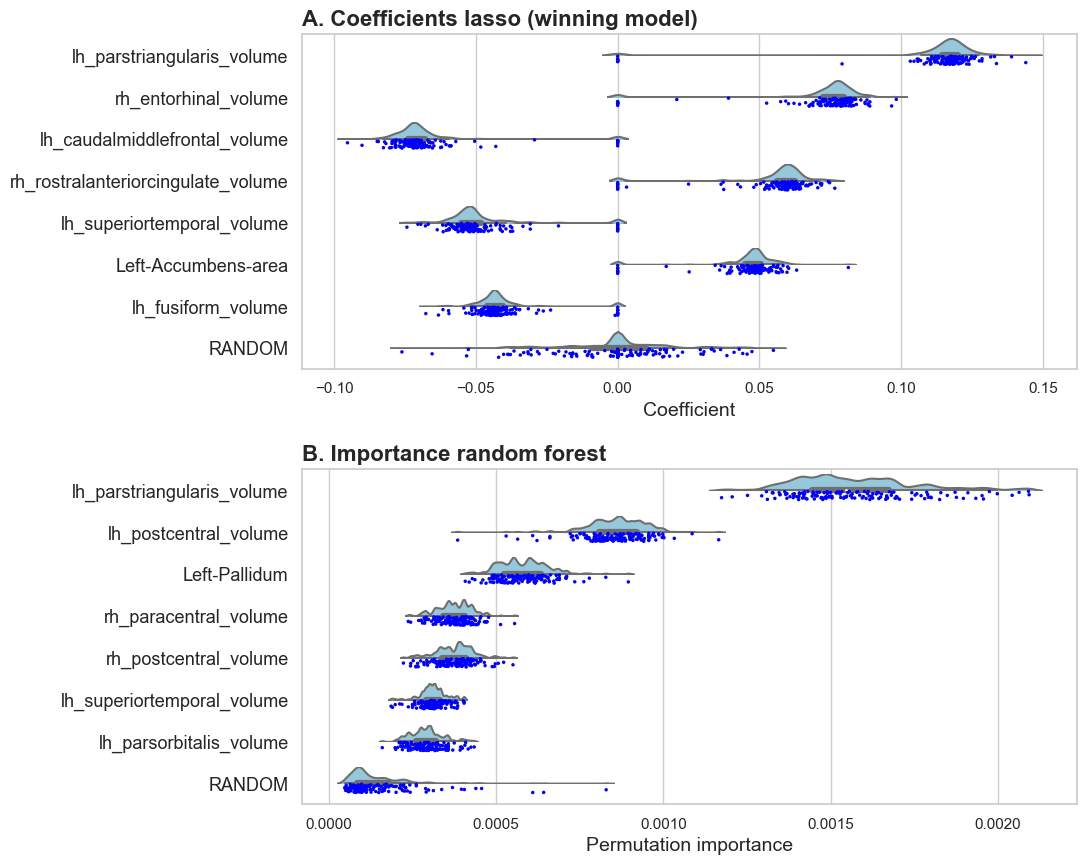

In [91]:
perm_top7 = [item for item in perm_imp.mean().head(7).keys()]
perm_top7.append('RANDOM')
importance = perm_imp[perm_top7]

coefbm_top7 = [item for item in coef_bm.mean().abs().sort_values(ascending = False).head(7).keys()]
coefbm_top7.append('RANDOM')
coefficient = coef_bm[coefbm_top7]

# make figure
sns.reset_defaults()
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.tick_params(axis='y', labelsize=13)

sns.violinplot(data = coefficient,  orient = 'h', scale = 'width', ax = ax1,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
for violin in ax1.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax1.transData))

old_len_collections = len(ax1.collections)
sns.stripplot(data = coefficient, orient = 'h', ax = ax1, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax1.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xlabel("Coefficient", fontsize = 14)
ax1.set_title("A. Coefficients lasso (winning model)", fontsize = 16, loc = 'left', fontweight = 'bold')



# plot best model
ax2.tick_params(axis='y', labelsize=13)

sns.violinplot(data = importance,  orient = 'h', scale = 'width', ax = ax2,  color = 'skyblue', bw = 0.1, saturation = 0.7)

xlim = ax2.get_xlim()
ylim = ax2.get_ylim()
for violin in ax2.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax2.transData))

old_len_collections = len(ax2.collections)
sns.stripplot(data = importance, orient = 'h', ax = ax2, size = 2.5, color = 'blue').set(ylabel = None)

for dots in ax2.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel("Permutation importance", fontsize = 14)
ax2.set_title("B. Importance random forest", fontsize = 16, loc = 'left', fontweight = 'bold')

plt.subplots_adjust(hspace = 0.3)

plt.savefig("importance_coefficients.png", bbox_inches="tight")
plt.show()